In [1]:
import numpy as np
from keras.layers import Input,Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# 32 - float 32
encoding_dimension = 32
input_img = Input(shape=(784,))
# encoding
encoded = Dense(encoding_dimension,activation='relu')(input_img)
# decoded
decoded = Dense(784,activation='sigmoid')(encoded)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# mapping input to its reconstruction
autoencoder = Model(input_img,decoded)
# mapping input to its encoded representation
encoder = Model(input_img,encoded)
# placeholder for encoded (32 dim) input
encoded_input = Input(shape=(encoding_dimension,))
# retrieve the last layer of autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input,decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [13]:
(x_train,_), (x_test,_) = mnist.load_data()

In [14]:
# normalize values b/w 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

In [16]:
# x_train.shape
x_test.shape

(10000, 784)

In [17]:
autoencoder.fit(x_train,x_train,epochs=50,batch_size=128,
                shuffle=True,validation_data=(x_test,x_test))

encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 128us/step - loss: 0.2313 - val_loss: 0.1597
Epoch 2/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.1423 - val_loss: 0.1267
Epoch 3/50
60000/60000 [==============================] - 7s 110us/step - loss: 0.1193 - val_loss: 0.1109
Epoch 4/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.1078 - val_loss: 0.1027
Epoch 5/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.1015 - val_loss: 0.0980
Epoch 6/50
60000/60000 [==============================] - 7s 119us/step - loss: 0.0979 - val_loss: 0.0954
Epoch 7/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.0959 - val_loss: 0.0939
Epoch 8/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.0949 - val_loss: 0.0933
Epoch 9/50
60000/60000 [==============================

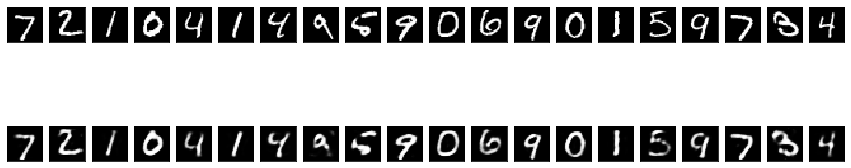

In [18]:
n = 20
plt.figure(figsize=(15,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_img[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()